In [5]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
    .builder \
    .appName("pyspark_Obl_NBA_hive") \
    .enableHiveSupport() \
    .getOrCreate()

## INSTALACION DE HERRAMIENTAS

In [6]:
!pip3 install pandas
import pandas as pd
!pip3 install matplotlib --user
import matplotlib.pyplot as plt
import builtins

## CREACION DE LA DATABASE

In [7]:
spark.sql("DROP DATABASE IF EXISTS obligatorioNBA CASCADE")
spark.sql("CREATE DATABASE IF NOT EXISTS obligatorioNBA;")

2025-07-08T18:25:08,028 INFO [Thread-4] org.apache.hadoop.hive.conf.HiveConf - Found configuration file file:/home/ort/spark/conf/hive-site.xml
2025-07-08T18:25:08,248 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.metastore.wm.default.pool.size does not exist
2025-07-08T18:25:08,248 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.llap.task.scheduler.preempt.independent does not exist
2025-07-08T18:25:08,248 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.llap.output.format.arrow does not exist
2025-07-08T18:25:08,248 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.tez.llap.min.reducer.per.executor does not exist
2025-07-08T18:25:08,248 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.arrow.root.allocator.limit does not exist
2025-07-08T18:25:08,249 WARN [Thread-4] org.apache.hadoop.hive.conf.HiveConf - HiveConf of name hive.vectorized.use.che

DataFrame[]

In [8]:
spark.sql("SHOW DATABASES").show()

+--------------+
|     namespace|
+--------------+
|      big_data|
|       default|
|obligatorionba|
+--------------+



## SCRIPTS DE CREACION DE LAS TABLAS

In [9]:
spark.sql("DROP TABLE IF EXISTS player_info")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE player_info
(
person_id INT,
school STRING,
position STRING,
team_id INT,
jersey1 STRING,
jersey2 STRING
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/mld/com_play_info_pqt'
""")

2025-07-08T18:25:13,547 INFO [Thread-4] org.apache.hadoop.hive.ql.security.authorization.plugin.sqlstd.SQLStdHiveAccessController - Created SQLStdHiveAccessController for session context : HiveAuthzSessionContext [sessionString=aa3607eb-9d7d-4b98-afb4-366ac33fd3b5, clientType=HIVECLI]
2025-07-08T18:25:13,555 WARN [Thread-4] org.apache.hadoop.hive.ql.session.SessionState - METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
2025-07-08T18:25:13,555 INFO [Thread-4] hive.metastore - Mestastore configuration hive.metastore.filter.hook changed from org.apache.hadoop.hive.metastore.DefaultMetaStoreFilterHookImpl to org.apache.hadoop.hive.ql.security.authorization.plugin.AuthorizationMetaStoreFilterHook
2025-07-08T18:25:13,560 INFO [Thread-4] hive.metastore - Closed a connection to metastore, current connections: 0
2025-07-08T18:25:13,563 INFO [Thread-4] hive.metastore - Trying to connect to metastore with URI thrift://l

DataFrame[]

In [10]:
spark.sql("DROP TABLE IF EXISTS player")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE player
(
player_id INT,
full_name STRING,
status STRING
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/mld/player_pqt'
""")

DataFrame[]

In [11]:
spark.sql("DROP TABLE IF EXISTS team")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE team
(
team_id INT,
full_name STRING,
state STRING,
year_founded INT
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/mld/team_pqt'
""")

DataFrame[]

In [12]:
spark.sql("DROP TABLE IF EXISTS game")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE game
(
game_id INT,
team_id_home INT,
pts_home INT,
team_id_away INT,
pts_away INT,
season INT
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/mld/game_pqt'
""")

DataFrame[]

In [13]:
spark.sql("DROP TABLE IF EXISTS play_pts")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE play_pts
(
game_id INT,
eventnum INT,
player_id INT,
team_id INT,
score_visitor INT,
score_home INT,
team_type STRING,
play_pts INT
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/mld/play_pts_pqt'
""")

DataFrame[]

## VALIDAR LA CARGA DE LAS TABLAS

In [14]:
spark.sql('select * from player_info limit 10;').show()

[Stage 0:>                                                          (0 + 1) / 1]

+---------+------------------+--------------+----------+-------+---------+
|person_id|            school|      position|   team_id|jersey1|  jersey2|
+---------+------------------+--------------+----------+-------+---------+
|   201587|           Le Mans| Guard-Forward|1610612746|     33|Undefined|
|  1628418|           Indiana|Center-Forward|1610612748|     13|Undefined|
|    76590|           Alabama|        Center|1610612765|     13|Undefined|
|  1629164|Florida Gulf Coast|         Guard|1610612739|     00|Undefined|
|     2580|     Brigham Young| Guard-Forward|1610612737|      6|Undefined|
|  1626209|      FC Barcelona| Forward-Guard|1610612753|     44|Undefined|
|    77194|         St. Louis|        Center|1610612757|     34|Undefined|
|    77292|      Kansas State|        Center|1610612755|     10|Undefined|
|    77486|     Texas-El Paso|       Forward|1610612750|     25|Undefined|
|    77615|            Auburn|       Forward|1610612759|     34|Undefined|
+---------+--------------

In [15]:
spark.sql('select * from player limit 10;').show()

+---------+----------------+--------+
|player_id|       full_name|  status|
+---------+----------------+--------+
|  1630175|    Cole Anthony|  Active|
|    76054|  Nate Archibald|Inactive|
|  1629633|  Jarrett Culver|  Active|
|     2223|Samuel Dalembert|Inactive|
|   201942|   DeMar DeRozan|  Active|
|    76599|      Larry Drew|Inactive|
|  1627770|      Kay Felder|Inactive|
|   101155|      Ryan Gomes|Inactive|
|    77112|  Winfred Jacobs|Inactive|
|    77129|      Les Jepsen|Inactive|
+---------+----------------+--------+



In [16]:
spark.sql('select * from team limit 10;').show()

+----------+--------------------+--------------+------------+
|   team_id|           full_name|         state|year_founded|
+----------+--------------------+--------------+------------+
|1610612741|       Chicago Bulls|      Illinois|        1966|
|1610612752|     New York Knicks|      New York|        1946|
|1610612751|       Brooklyn Nets|      New York|        1976|
|1610612738|      Boston Celtics| Massachusetts|        1946|
|1610612762|           Utah Jazz|          Utah|        1974|
|1610612750|Minnesota Timberw...|     Minnesota|        1989|
|1610612766|   Charlotte Hornets|North Carolina|        1988|
|1610612748|          Miami Heat|       Florida|        1988|
|1610612758|    Sacramento Kings|    California|        1948|
|1610612757|Portland Trail Bl...|        Oregon|        1970|
+----------+--------------------+--------------+------------+



In [17]:
spark.sql('select * from game limit 10;').show()

+--------+------------+--------+------------+--------+------+
| game_id|team_id_home|pts_home|team_id_away|pts_away|season|
+--------+------------+--------+------------+--------+------+
|24600156|  1610610026|      74|  1610610032|      78|  1946|
|24600187|  1610612738|      57|  1610610036|      80|    -1|
|24800213|  1610612747|      89|  1610612744|      71|  1948|
|24800254|  1610612765|      89|  1610612744|      87|  1948|
|24800326|  1610610029|      80|  1610610034|      81|  1948|
|44800212|  1610610025|      85|  1610612747|     101|  1948|
|25000004|  1610610036|     100|  1610610030|      84|  1950|
|25000213|  1610612755|      86|  1610612744|      96|  1950|
|25000260|  1610612738|      85|  1610612737|      70|  1950|
|25000270|  1610610024|      72|  1610612755|      80|  1950|
+--------+------------+--------+------------+--------+------+



In [18]:
spark.sql('select * from play_pts limit 10;').show()

+--------+--------+---------+----------+-------------+----------+---------+--------+
| game_id|eventnum|player_id|   team_id|score_visitor|score_home|team_type|play_pts|
+--------+--------+---------+----------+-------------+----------+---------+--------+
|20200222|       8|     1897|1610612754|            0|         1|     home|       1|
|20000814|     156|      330|1610612762|           31|        31|     home|       2|
|20400395|     471|      363|1610612748|          100|       107|     home|       1|
|20200134|     420|      708|1610612750|           85|        79|     home|       2|
|20100021|     275|      976|1610612746|           53|        49|  visitor|       2|
|20101188|      76|     1444|1610612758|           12|        20|  visitor|       2|
|20500558|     221|     1495|1610612759|           40|        42|     home|       1|
|20100856|     386|     1607|1610612753|           75|        87|  visitor|       1|
|20501030|     187|     1889|1610612743|           31|        42|

In [19]:
spark.sql('describe formatted game').show(50, truncate=False)

+----------------------------+--------------------------------------------------------------+-------+
|col_name                    |data_type                                                     |comment|
+----------------------------+--------------------------------------------------------------+-------+
|game_id                     |int                                                           |null   |
|team_id_home                |int                                                           |null   |
|pts_home                    |int                                                           |null   |
|team_id_away                |int                                                           |null   |
|pts_away                    |int                                                           |null   |
|season                      |int                                                           |null   |
|                            |                                                    

In [20]:
spark.sql('describe formatted player_info').show(50, truncate=False)

+----------------------------+----------------------------------------------------------------+-------+
|col_name                    |data_type                                                       |comment|
+----------------------------+----------------------------------------------------------------+-------+
|person_id                   |int                                                             |null   |
|school                      |string                                                          |null   |
|position                    |string                                                          |null   |
|team_id                     |int                                                             |null   |
|jersey1                     |string                                                          |null   |
|jersey2                     |string                                                          |null   |
|                            |                                  

In [21]:
spark.sql('describe formatted player').show(50, truncate=False)

+----------------------------+--------------------------------------------------------------+-------+
|col_name                    |data_type                                                     |comment|
+----------------------------+--------------------------------------------------------------+-------+
|player_id                   |int                                                           |null   |
|full_name                   |string                                                        |null   |
|status                      |string                                                        |null   |
|                            |                                                              |       |
|# Detailed Table Information|                                                              |       |
|Catalog                     |spark_catalog                                                 |       |
|Database                    |obligatorionba                                      

In [22]:
spark.sql('describe formatted team').show(50, truncate=False)

+----------------------------+--------------------------------------------------------------+-------+
|col_name                    |data_type                                                     |comment|
+----------------------------+--------------------------------------------------------------+-------+
|team_id                     |int                                                           |null   |
|full_name                   |string                                                        |null   |
|state                       |string                                                        |null   |
|year_founded                |int                                                           |null   |
|                            |                                                              |       |
|# Detailed Table Information|                                                              |       |
|Catalog                     |spark_catalog                                       

In [23]:
spark.sql('describe formatted play_pts').show(50, truncate=False)

+----------------------------+--------------------------------------------------------------+-------+
|col_name                    |data_type                                                     |comment|
+----------------------------+--------------------------------------------------------------+-------+
|game_id                     |int                                                           |null   |
|eventnum                    |int                                                           |null   |
|player_id                   |int                                                           |null   |
|team_id                     |int                                                           |null   |
|score_visitor               |int                                                           |null   |
|score_home                  |int                                                           |null   |
|team_type                   |string                                              

## RESOLUCION DE LAS CONSULTAS

### CONSULTA 1

¿Cuál es el top 10, de promedio de puntos de cada equipo en la temporada 2018?

In [24]:
query1 = spark.sql("""
SELECT EQUIPO, ROUND(AVG(PUNTOS), 4) AS PROMEDIO
FROM (
    SELECT t.full_name AS EQUIPO, g.pts_home AS PUNTOS
    FROM game g
    JOIN team t ON g.team_id_home = t.team_id
    WHERE g.season = 2018

    UNION ALL

    SELECT t.full_name AS EQUIPO, g.pts_away AS PUNTOS
    FROM game g
    JOIN team t ON g.team_id_away = t.team_id
    WHERE g.season = 2018
)
GROUP BY EQUIPO
ORDER BY PROMEDIO DESC
LIMIT 10;
""")

query1.show()

+--------------------+--------+
|              EQUIPO|PROMEDIO|
+--------------------+--------+
|     Milwaukee Bucks|117.1236|
|Golden State Warr...|116.6129|
|    Sacramento Kings|115.3714|
|New Orleans Pelicans|114.9296|
|Los Angeles Clippers| 114.725|
|  Washington Wizards|114.3733|
|  Philadelphia 76ers|114.2921|
|Portland Trail Bl...|114.0562|
|     Houston Rockets|113.2778|
|Oklahoma City Thu...|113.2468|
+--------------------+--------+



#### VISUALIZACION

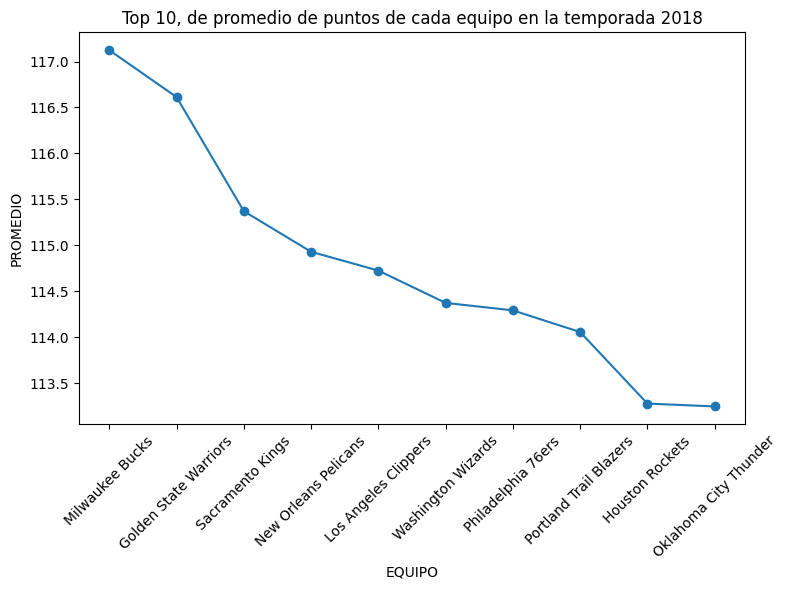

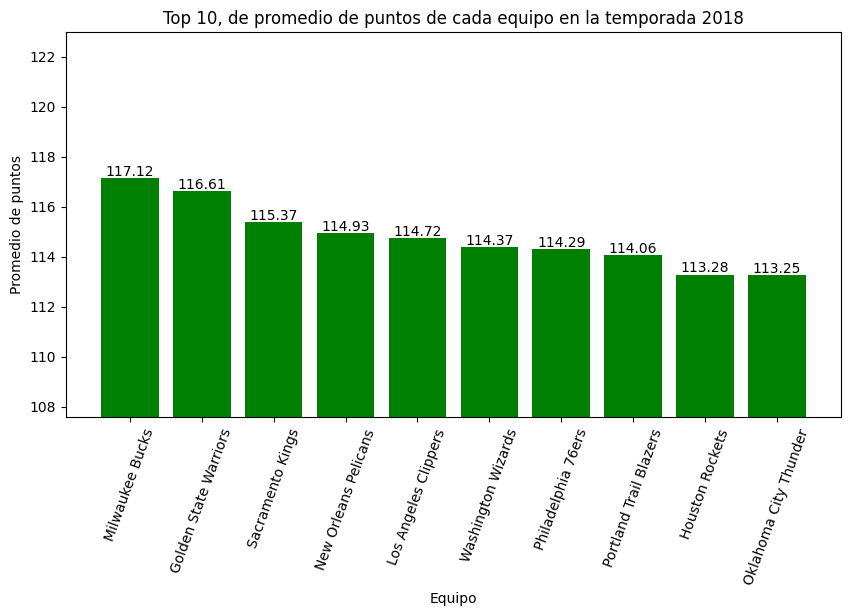

In [25]:
df = query1.toPandas()

# VISUALIZACION 1
plt.figure(figsize=(8,6))
plt.plot(df['EQUIPO'], df['PROMEDIO'], marker='o')
plt.xlabel('EQUIPO')
plt.ylabel('PROMEDIO')
plt.title('Top 10, de promedio de puntos de cada equipo en la temporada 2018')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# VISUALIZACION 2
plt.figure(figsize=(10, 5))
plt.bar(df['EQUIPO'], df['PROMEDIO'], color='green')
plt.xlabel('Equipo')
plt.ylabel('Promedio de puntos')
plt.title('Top 10, de promedio de puntos de cada equipo en la temporada 2018')

min_prom = df['PROMEDIO'].min()
plt.ylim(min_prom * 0.95, df['PROMEDIO'].max() * 1.05)

for i, v in enumerate(df['PROMEDIO']):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.xticks(rotation=70)  
plt.show()

### CONSULTA 2

¿Cuántos jugadores, por cada posicion, juegan en equipos fundados hace más de 60 años?

In [26]:
query2 = spark.sql("""
SELECT COUNT(p.*) AS CANTIDAD, p.position AS POSICION
FROM player_info p
JOIN team t ON p.team_id = t.team_id
WHERE year(current_date()) - t.year_founded >= 60
GROUP BY POSICION
""")

query2.show()

+--------+--------------+
|CANTIDAD|      POSICION|
+--------+--------------+
|      32| Guard-Forward|
|     516|         Guard|
|       1|     Undefined|
|      19|Center-Forward|
|     491|       Forward|
|       9| Forward-Guard|
|     185|        Center|
|      38|Forward-Center|
+--------+--------------+



#### VISUALIZACION

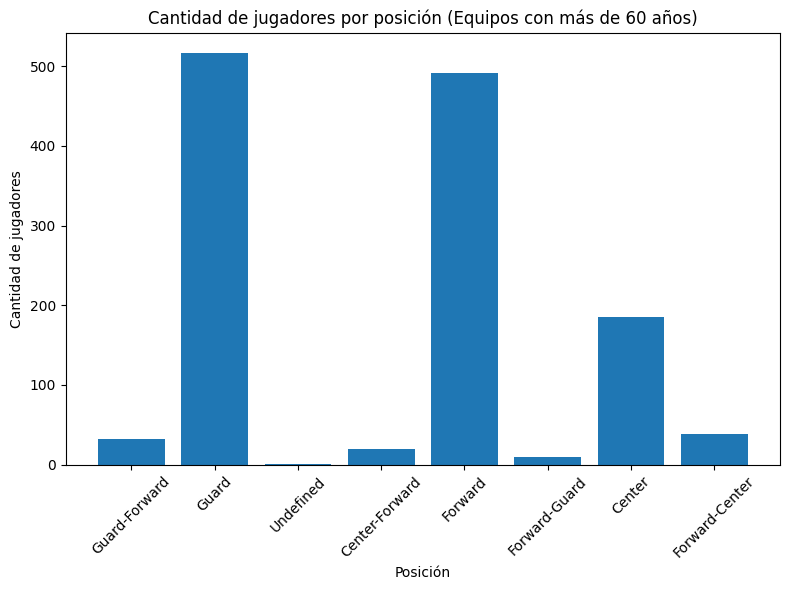

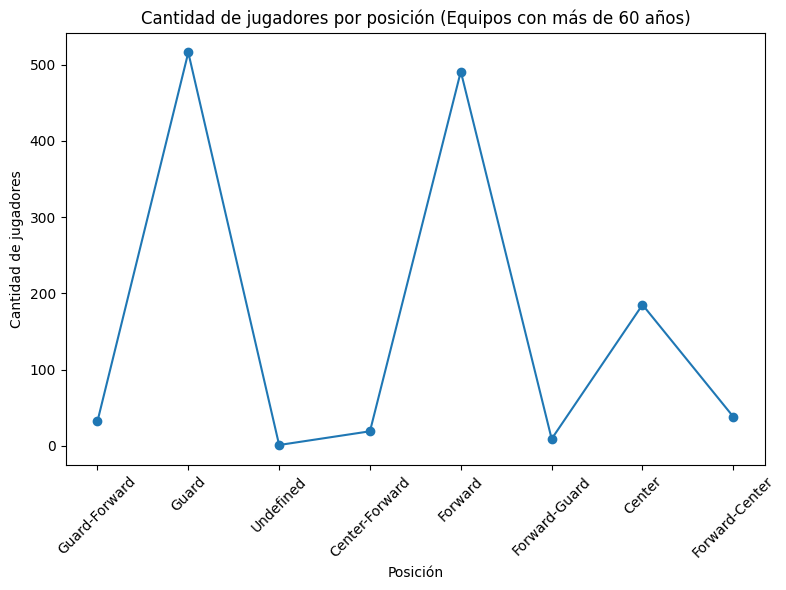

In [27]:
df = query2.toPandas()

# VISUALIZACION 1
plt.figure(figsize=(8,6))
plt.bar(df['POSICION'], df['CANTIDAD'])
plt.xlabel('Posición')
plt.ylabel('Cantidad de jugadores')
plt.title('Cantidad de jugadores por posición (Equipos con más de 60 años)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# VISUALIZACION 2
plt.figure(figsize=(8,6))
plt.plot(df['POSICION'], df['CANTIDAD'], marker='o')
plt.xlabel('Posición')
plt.ylabel('Cantidad de jugadores')
plt.title('Cantidad de jugadores por posición (Equipos con más de 60 años)')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

### CONSULTA 3

¿Cuál es el top 3 de números de camiseta con más triples anotados por jugadores que hayan estudiado en UCLA?

In [28]:
query3 = spark.sql("""
SELECT pl.full_name AS NOMBRE, pi.jersey1 AS CAMISETA, COUNT(p.game_id) AS TRIPLES
FROM play_pts p
JOIN player_info pi ON p.player_id = pi.person_id
JOIN player pl ON p.player_id = pl.player_id
WHERE p.play_pts = 3
AND pi.school = "UCLA"
GROUP BY pi.jersey1, pl.full_name
ORDER BY triples DESC
LIMIT 3
""")

query3.show()

+-----------------+--------+-------+
|           NOMBRE|CAMISETA|TRIPLES|
+-----------------+--------+-------+
|    Reggie Miller|      31|   1318|
|Russell Westbrook|       0|   1202|
|      Matt Barnes|      22|    877|
+-----------------+--------+-------+



#### VISUALIZACION

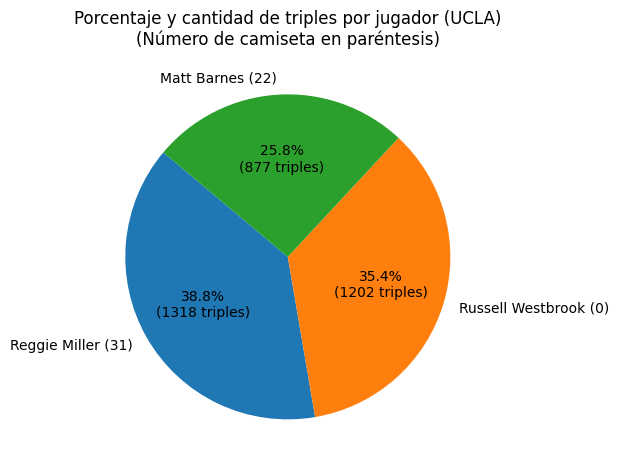

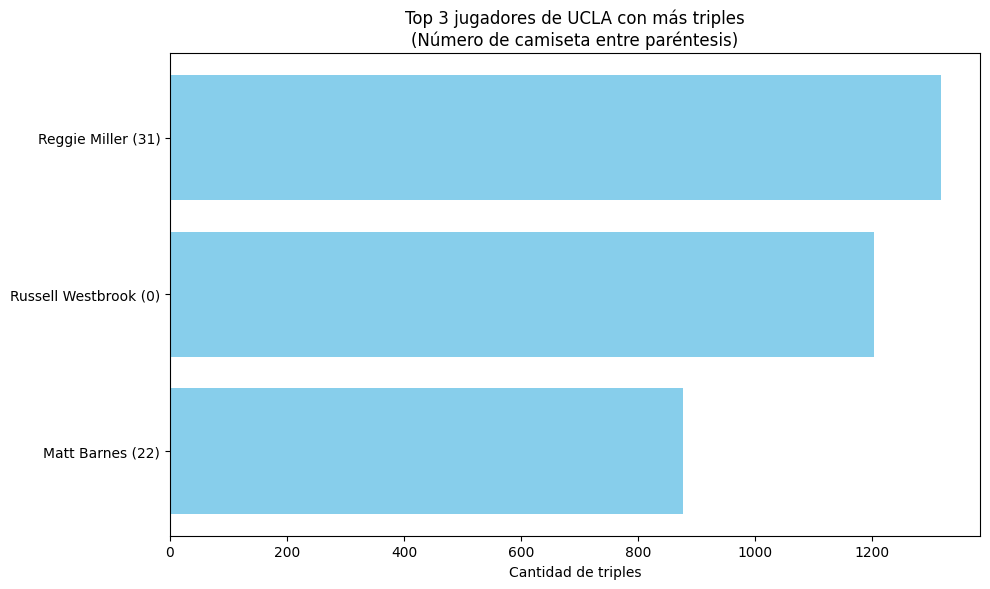

In [29]:
df = query3.toPandas()

# VISUALIZACION 1
labels = [f"{nombre} ({camiseta})" for nombre, camiseta in zip(df['NOMBRE'], df['CAMISETA'])]
allvals = df['TRIPLES'].astype(int).tolist()
total = builtins.sum(allvals) 

def func(pct):
    absolute = int(builtins.round(pct / 100 * total))  
    return f"{pct:.1f}%\n({absolute} triples)"

plt.pie(
    allvals,
    labels=labels,
    autopct=func,
    startangle=140
)
plt.title('Porcentaje y cantidad de triples por jugador (UCLA)\n(Número de camiseta en paréntesis)')
plt.tight_layout()
plt.show()

#VISUALIZACION 2
labels = [f"{nombre} ({camiseta})" for nombre, camiseta in zip(df['NOMBRE'], df['CAMISETA'])]
values = df['TRIPLES'].astype(int).tolist()

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Cantidad de triples")
plt.title("Top 3 jugadores de UCLA con más triples\n(Número de camiseta entre paréntesis)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### CONSULTA 4

¿Cuál es la cantidad de veces que cada equipo de Nueva York haya ganado como local?

In [30]:
query4 = spark.sql("""
SELECT COUNT(g.team_id_home) AS CANTIDAD, t.full_name AS EQUIPO
FROM game g
JOIN team t ON g.team_id_home = t.team_id
WHERE g.pts_home > g.pts_away
AND t.state = "New York"
GROUP BY t.full_name
""")

query4.show()

+--------+---------------+
|CANTIDAD|         EQUIPO|
+--------+---------------+
|    1023|  Brooklyn Nets|
|    1763|New York Knicks|
+--------+---------------+



### CONSULTA 5

¿Cuál es el promedio de puntos anotados por los jugadores actualmente inactivos por temporadas? Top 10

In [31]:
query5 = spark.sql("""
SELECT ROUND(AVG(pp.play_pts), 4) AS PROMEDIO, g.season AS TEMPORADA
FROM play_pts pp
JOIN game g ON g.game_id = pp.game_id
JOIN player p ON p.player_id = pp.player_id
WHERE p.status = "Inactive"
GROUP BY g.season
ORDER BY PROMEDIO DESC
LIMIT 10
""")

query5.show()

[Stage 37:>                                                         (0 + 2) / 2]

+--------+---------+
|PROMEDIO|TEMPORADA|
+--------+---------+
|  1.9616|     2021|
|  1.9505|     2020|
|  1.9274|     2019|
|   1.912|     2018|
|   1.912|     2017|
|  1.8772|     2016|
|   1.849|     2015|
|  1.8363|     2014|
|  1.8291|     2013|
|  1.8141|     2011|
+--------+---------+



## GUARDAR LAS RESPUESTAS COMO PARQUET

In [32]:
query4.write \
  .mode("overwrite") \
  .option("header", True) \
  .parquet("/data_obligatorio_NBA/anl/resultado_pregunta4")

query5.write \
  .mode("overwrite") \
  .option("header", True) \
  .parquet("/data_obligatorio_NBA/anl/resultado_pregunta5")

### VERIFICAR EL GUARDADO DE LAS RESPUESTAS

In [33]:
df_parquet = spark.read.parquet("/data_obligatorio_NBA/anl/resultado_pregunta4")
df_parquet.show()

+--------+---------------+
|CANTIDAD|         EQUIPO|
+--------+---------------+
|    1023|  Brooklyn Nets|
|    1763|New York Knicks|
+--------+---------------+



In [34]:
df_parquet = spark.read.parquet("/data_obligatorio_NBA/anl/resultado_pregunta5")
df_parquet.show()

+--------+---------+
|PROMEDIO|TEMPORADA|
+--------+---------+
|  1.9616|     2021|
|  1.9505|     2020|
|  1.9274|     2019|
|   1.912|     2018|
|   1.912|     2017|
|  1.8772|     2016|
|   1.849|     2015|
|  1.8363|     2014|
|  1.8291|     2013|
|  1.8141|     2011|
+--------+---------+



## CREAR TABLAS HIVE PARA LAS RESPUESTAS

In [35]:
spark.sql("DROP TABLE IF EXISTS pregunta4")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE pregunta4
(
CANTIDAD BIGINT,
EQUIPO STRING
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/anl/resultado_pregunta4'
""")

DataFrame[]

In [36]:
spark.sql("DROP TABLE IF EXISTS pregunta5")

spark.sql("USE obligatorioNBA")

spark.sql("""
CREATE EXTERNAL TABLE pregunta5
(
PROMEDIO DOUBLE,
TEMPORADA INT
)
STORED AS PARQUET
LOCATION '/data_obligatorio_NBA/anl/resultado_pregunta5'
""")

DataFrame[]

###

### VERIFICAR LA CREACION DE LAS TABLAS HIVE

In [37]:
spark.sql("SELECT * FROM pregunta4").show()

+--------+---------------+
|CANTIDAD|         EQUIPO|
+--------+---------------+
|    1023|  Brooklyn Nets|
|    1763|New York Knicks|
+--------+---------------+



In [38]:
spark.sql("SELECT * FROM pregunta5").show()

+--------+---------+
|PROMEDIO|TEMPORADA|
+--------+---------+
|  1.9616|     2021|
|  1.9505|     2020|
|  1.9274|     2019|
|   1.912|     2018|
|   1.912|     2017|
|  1.8772|     2016|
|   1.849|     2015|
|  1.8363|     2014|
|  1.8291|     2013|
|  1.8141|     2011|
+--------+---------+

